In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys
new_paths = ['../Misc/', '../src/','../src/faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/']
[sys.path.append(d) for d in new_paths if not d in sys.path]
from misc import *
import faultdiagnosistoolbox as fdt
import scipy.sparse as sp

The introductory example from the paper _Sensor placement for fault diagnosis_ by Mattias Krysander and Erik Frisk, IEEE Transactions on Systems, Man and Cybernetics, Part A: Systems and Humans (2008): 1398-1410.

\begin{align*}
 \dot{x}_1 &= -x_1 + x_2 + x_5\\
 \dot{x}_2 &= -2\, x_2 + x_3 + x_4\\
 \dot{x}_3 &= -3\, x_3 + x_5 + f_1 + f_2\\
 \dot{x}_4 &= -4\, x_4 + x_5 + f_3\\
 \dot{x}_5 &= -5\, x_5 + u + f_4
\end{align*}

In [2]:
modelDef={}
modelDef['type'] = 'MatrixStruc'
modelDef['X'] = [
    [1, 1, 0, 0, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1]]
modelDef['F'] = [
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]]
modelDef['Z'] = []
model = fdt.DiagnosisModel(modelDef, name='Small linear model')

Plot structural model

<IPython.core.display.Javascript object>


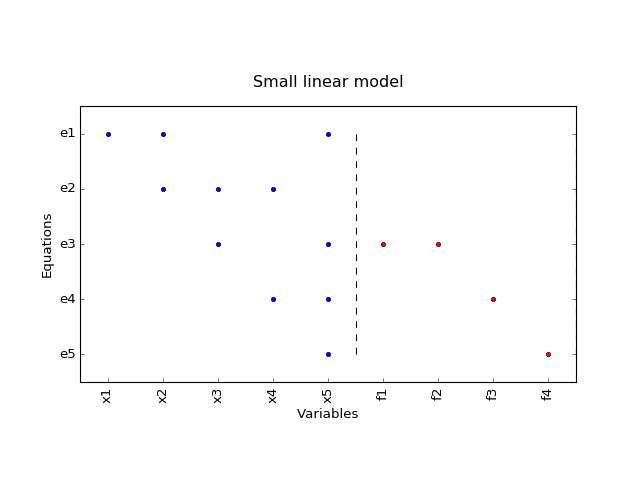

In [3]:
plt.figure(10)
model.PlotModel()

Determine sensors need to make faults detectable

In [9]:
sDet,_ = model.SensorPlacementDetectability()
print "Sensor sets: " + str(sDet)
model2 = model.copy()
model2.AddSensors(sDet[0])
df,ndf = model2.DetectabilityAnalysis()
print "Detectable faults: " + str(df)

Sensor sets: [['x1'], ['x2'], ['x3', 'x4']]
Detectable faults: ['f1', 'f2', 'f3', 'f4']


Determine sensors needed to make faults isolable when new sensors can not fail

Sensor sets: 
[['x1', 'x3'], ['x1', 'x4'], ['x2', 'x3'], ['x2', 'x4'], ['x3', 'x4']]


<IPython.core.display.Javascript object>


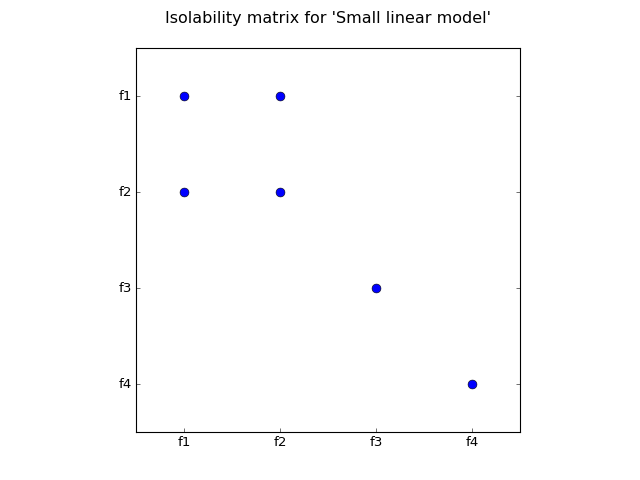

<IPython.core.display.Javascript object>


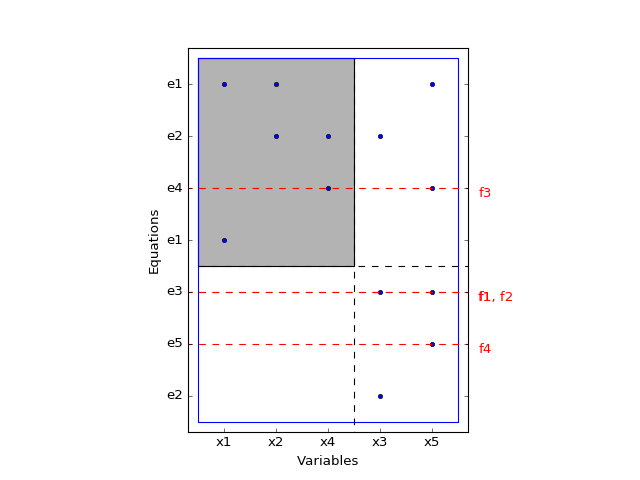

In [22]:
model.SensorLocationsWithFaults() # No new sensors may become faulty
sIsol,_ = model.SensorPlacementIsolability()
print "Sensor sets: "
print sIsol

model3 = model.copy()
model3.AddSensors(sIsol[0])
plt.figure(20)
model3.IsolabilityAnalysis(plot=True);

plt.figure(21)
model3.PlotDM(eqclass=True,fault=True)

Determine sensors needed to make faults isolable when all new sensors can fail

Sensor sets: 
[['x1', 'x2', 'x4'], ['x1', 'x1', 'x4'], ['x1', 'x3', 'x4'], ['x1', 'x2', 'x3'], ['x1', 'x1', 'x3'], ['x2', 'x2', 'x4'], ['x2', 'x3', 'x4'], ['x2', 'x2', 'x3'], ['x3', 'x3', 'x4', 'x4']]


<IPython.core.display.Javascript object>


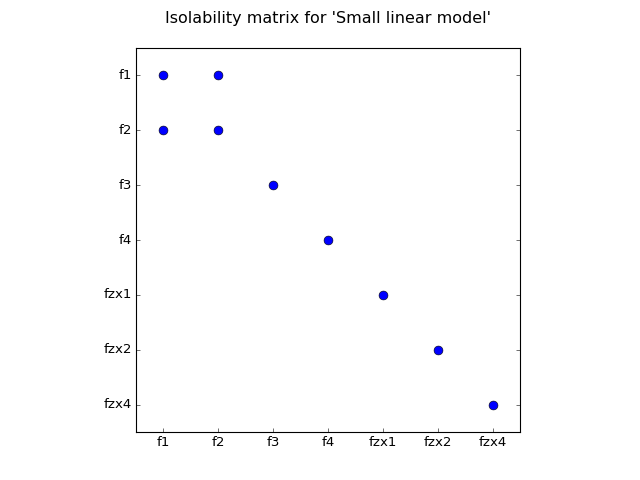

<IPython.core.display.Javascript object>


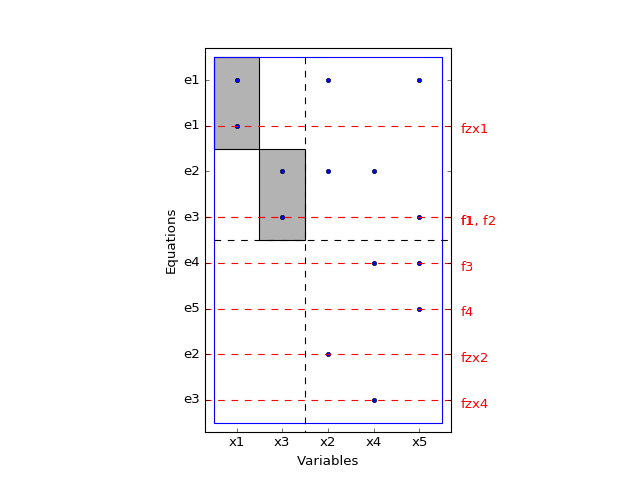

In [23]:
model.SensorLocationsWithFaults(model.x) # Set all new sensors may become faulty
sIsol,_ = model.SensorPlacementIsolability()
print "Sensor sets: "
print sIsol

model4 = model.copy()
model4.AddSensors(sIsol[0])
plt.figure(30)
model4.IsolabilityAnalysis(plot=True);

plt.figure(31)
model4.PlotDM(eqclass=True,fault=True)